# Practical Lab: Linear Regression by using the gradient descent algorithm

## Utils

In [2]:
from sklearn import datasets # donnees
import os # rep de travail
import pandas as pd # data analysis
from scipy import stats # stat desc
import matplotlib.pyplot as plt # graphiques
import numpy as np # maths
import seaborn as sns

## Data

In [3]:
#-- Reading the (training) data in a data frame
dfpath= "./data/pm25_train_data.csv"
df_train =pd.read_csv(dfpath,sep=";")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11918 entries, 0 to 11917
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PM2.5        11918 non-null  float64
 1   SO2          11667 non-null  float64
 2   NO2          11636 non-null  float64
 3   CO           11462 non-null  float64
 4   O3           11677 non-null  float64
 5   temperature  11898 non-null  float64
 6   pressure     11898 non-null  float64
 7   dew point    11898 non-null  float64
 8   rainfall     11898 non-null  float64
 9   windspeed    11900 non-null  float64
dtypes: float64(10)
memory usage: 931.2 KB
None


In [4]:
df_train.head() #first few rows

,PM2.5,SO2,NO2,CO,O3,temperature,pressure,dew point,rainfall,windspeed
0,24.0,7.0,13.0,300.0,74.0,3.9,1027.3,-19.7,0.0,5.1
1,93.0,25.0,76.0,900.0,22.0,2.7,1027.3,-16.4,0.0,2.7
2,117.0,77.0,99.0,1600.0,14.0,13.8,1012.5,-13.3,0.0,1.1
3,58.0,12.0,14.0,400.0,77.0,14.2,1018.9,-13.9,0.0,2.7
4,226.0,104.0,136.0,2299.0,15.0,11.9,1009.7,-7.5,0.0,1.3


In [5]:
df_train.describe() # statistics of the data
# the describe shows us that the number of count is not same for each column

,PM2.5,SO2,NO2,CO,O3,temperature,pressure,dew point,rainfall,windspeed
count,11918.000000,11667.000000,11636.000000,11462.000000,11677.000000,11898.000000,11898.000000,11898.000000,11898.000000,11900.000000
mean,144.962326,21.960768,44.788865,1165.367650,73.894402,17.924920,1009.787557,2.765969,0.047630,2.243664
std,103.807565,27.065010,33.186310,1019.736671,51.840188,10.751675,10.074917,13.483896,0.532651,1.346997
min,3.000000,0.571200,2.000000,100.000000,0.214200,-6.800000,984.500000,-31.300000,0.000000,0.000000
25%,71.000000,4.000000,19.000000,500.000000,34.000000,8.200000,1001.800000,-8.300000,0.000000,1.300000
50%,120.000000,12.000000,37.000000,900.000000,66.000000,19.900000,1009.400000,3.100000,0.000000,1.900000
75%,192.000000,29.000000,62.000000,1500.000000,103.000000,27.400000,1017.600000,15.000000,0.000000,2.700000
max,844.000000,224.000000,273.000000,10000.000000,345.000000,39.800000,1036.300000,28.500000,31.200000,12.900000


In [6]:
training_data = df_train.dropna() # deletes null values
training_data.describe() #number of count is same for each column after removing the null values

,PM2.5,SO2,NO2,CO,O3,temperature,pressure,dew point,rainfall,windspeed
count,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000
mean,144.785609,21.803471,44.614596,1165.918100,74.123981,17.943513,1009.810802,2.826747,0.046918,2.235968
std,102.926739,26.880259,32.895568,1010.439512,51.904421,10.751609,10.075603,13.450111,0.535652,1.337821
min,3.000000,0.856800,2.000000,100.000000,0.214200,-6.800000,984.500000,-31.300000,0.000000,0.000000
25%,71.000000,4.000000,19.000000,500.000000,34.000000,8.200000,1001.800000,-8.200000,0.000000,1.300000
50%,120.000000,12.000000,36.000000,900.000000,66.000000,20.000000,1009.300000,3.100000,0.000000,1.900000
75%,192.000000,28.000000,62.000000,1500.000000,103.000000,27.400000,1017.600000,15.000000,0.000000,2.700000
max,844.000000,224.000000,273.000000,10000.000000,345.000000,39.800000,1036.300000,28.500000,31.200000,12.900000


In [7]:
#-- Save the explanatory variables in a variable X (and their names in a variable called feature_names), and the target variable in Y 

feature_names = list(training_data.columns)[1:] #saved names of features as a list
print(feature_names) 
X = training_data.drop("PM2.5", axis=1) #remove the first column of the table( the first column is the target value (Y))
print(X)
Y = training_data["PM2.5"] # select the first column of the training data as Y (target values)
print(Y)

#another way to do it is:
#list(training_data.columns.values)
#list(training_data.columns) or 
#list(training_data)




['SO2', 'NO2', 'CO', 'O3', 'temperature', 'pressure', 'dew point', 'rainfall', 'windspeed']
         SO2    NO2      CO    O3  temperature  pressure  dew point  rainfall  \
0        7.0   13.0   300.0  74.0          3.9    1027.3      -19.7       0.0   
1       25.0   76.0   900.0  22.0          2.7    1027.3      -16.4       0.0   
2       77.0   99.0  1600.0  14.0         13.8    1012.5      -13.3       0.0   
3       12.0   14.0   400.0  77.0         14.2    1018.9      -13.9       0.0   
4      104.0  136.0  2299.0  15.0         11.9    1009.7       -7.5       0.0   
...      ...    ...     ...   ...          ...       ...        ...       ...   
11913   19.0   41.0  1300.0  21.0         -5.3    1035.3      -14.1       0.0   
11914   22.0   60.0  2100.0  20.0         -0.8    1031.6      -11.6       0.0   
11915   46.0   99.0  3000.0  12.0          0.4    1024.0       -7.1       0.0   
11916    7.0   15.0   500.0  63.0          4.1    1026.7      -10.8       0.0   
11917   12.0   54

In [8]:
Y.shape

(11160,)

### Analyser et sélectionner les données étudiées

In [9]:
#-- Display some statistics on the data by using the describe function on the dataframe
X.describe() #have a look into the statistical qualities of X
#no of rows(observations) is 11160

,SO2,NO2,CO,O3,temperature,pressure,dew point,rainfall,windspeed
count,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000
mean,21.803471,44.614596,1165.918100,74.123981,17.943513,1009.810802,2.826747,0.046918,2.235968
std,26.880259,32.895568,1010.439512,51.904421,10.751609,10.075603,13.450111,0.535652,1.337821
min,0.856800,2.000000,100.000000,0.214200,-6.800000,984.500000,-31.300000,0.000000,0.000000
25%,4.000000,19.000000,500.000000,34.000000,8.200000,1001.800000,-8.200000,0.000000,1.300000
50%,12.000000,36.000000,900.000000,66.000000,20.000000,1009.300000,3.100000,0.000000,1.900000
75%,28.000000,62.000000,1500.000000,103.000000,27.400000,1017.600000,15.000000,0.000000,2.700000
max,224.000000,273.000000,10000.000000,345.000000,39.800000,1036.300000,28.500000,31.200000,12.900000


In [10]:
Y.describe() #have a look into the statistical qualities of X
#no of rows(observations) is 11160, same as X, what we expect

count    11160.000000
mean       144.785609
std        102.926739
min          3.000000
25%         71.000000
50%        120.000000
75%        192.000000
max        844.000000
Name: PM2.5, dtype: float64

In [12]:
for i in X:
    print(X[i].name)
    

SO2
NO2
CO
O3
temperature
pressure
dew point
rainfall
windspeed


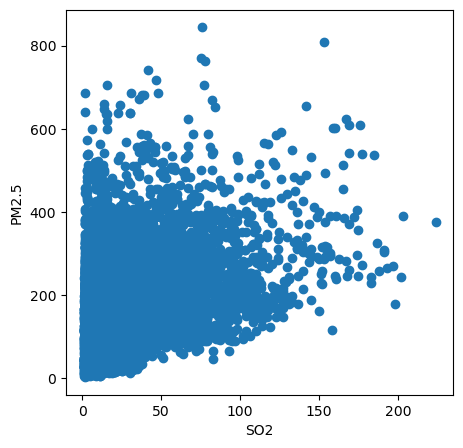

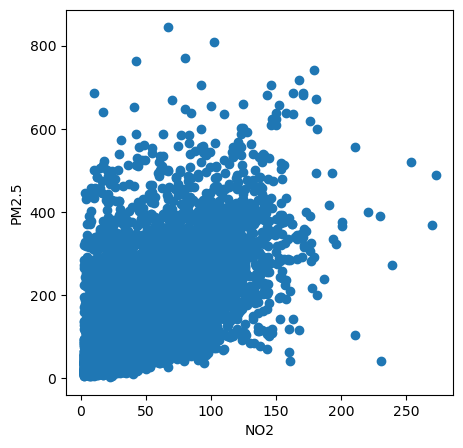

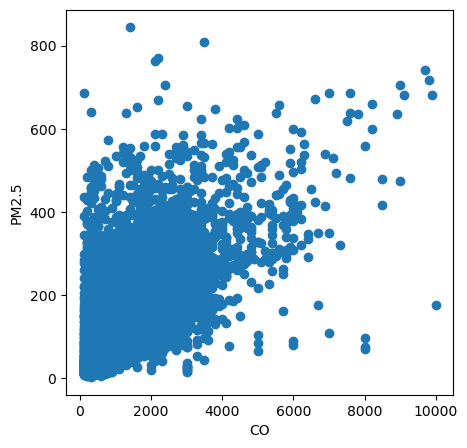

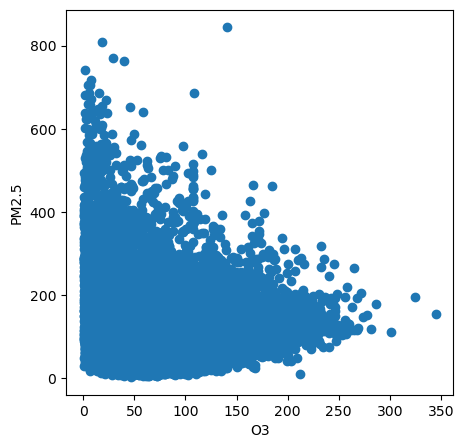

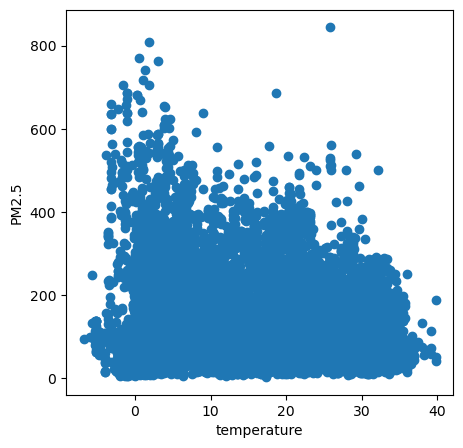

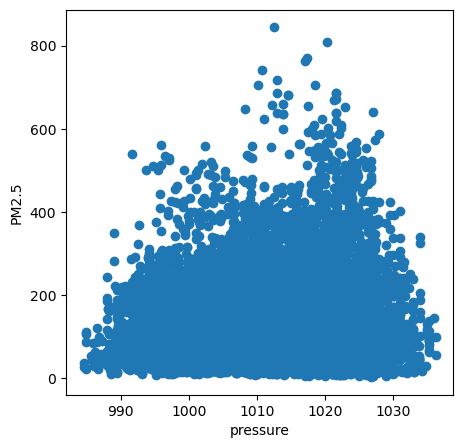

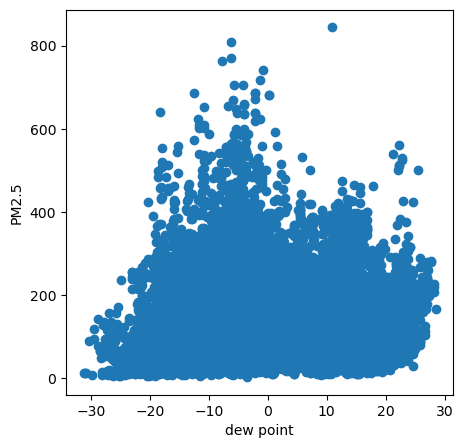

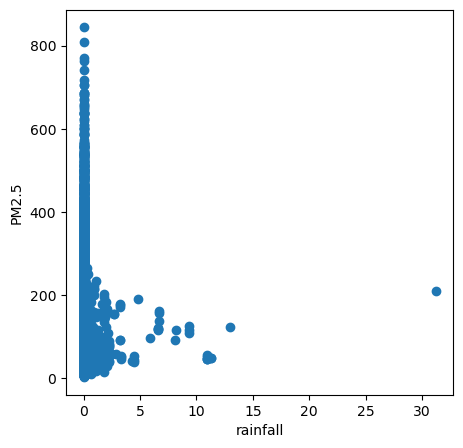

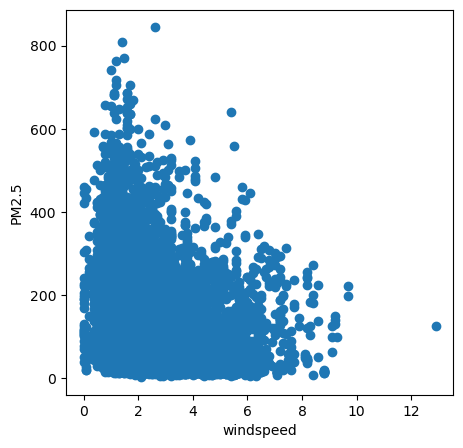

In [13]:
#-- Draw scatter plots to observe each observatory variable against the target variable, Y
for i in X:
    plt.figure(figsize=(5,5))
    plt.scatter(X[i], Y)
    plt.xlabel(X[i].name)
    plt.ylabel("PM2.5")
    plt.show()



In [11]:
# find the correlation between the variables to know which x variable best explains the Y
training_data.corr()

,PM2.5,SO2,NO2,CO,O3,temperature,pressure,dew point,rainfall,windspeed
PM2.5,1.000000,0.485462,0.572813,0.636648,-0.218340,-0.246685,0.140336,-0.029720,-0.037032,-0.187595
SO2,0.485462,1.000000,0.598753,0.630310,-0.287325,-0.366533,0.231831,-0.242011,-0.041511,-0.163247
NO2,0.572813,0.598753,1.000000,0.744382,-0.417748,-0.217173,0.146548,0.014724,-0.009562,-0.347697
CO,0.636648,0.630310,0.744382,1.000000,-0.323917,-0.273665,0.139458,0.041599,0.022054,-0.313852
O3,-0.218340,-0.287325,-0.417748,-0.323917,1.000000,0.683293,-0.555046,0.459740,-0.030031,0.100689
temperature,-0.246685,-0.366533,-0.217173,-0.273665,0.683293,1.000000,-0.811459,0.810234,-0.001144,-0.093390
pressure,0.140336,0.231831,0.146548,0.139458,-0.555046,-0.811459,1.000000,-0.716093,-0.030913,0.062114
dew point,-0.029720,-0.242011,0.014724,0.041599,0.459740,0.810234,-0.716093,1.000000,0.087952,-0.350106
rainfall,-0.037032,-0.041511,-0.009562,0.022054,-0.030031,-0.001144,-0.030913,0.087952,1.000000,-0.035374
windspeed,-0.187595,-0.163247,-0.347697,-0.313852,0.100689,-0.093390,0.062114,-0.350106,-0.035374,1.000000


The explanatory variable with the highest correlation is CO, meaning it best explains the target, so it should be used for the  simple linear regression

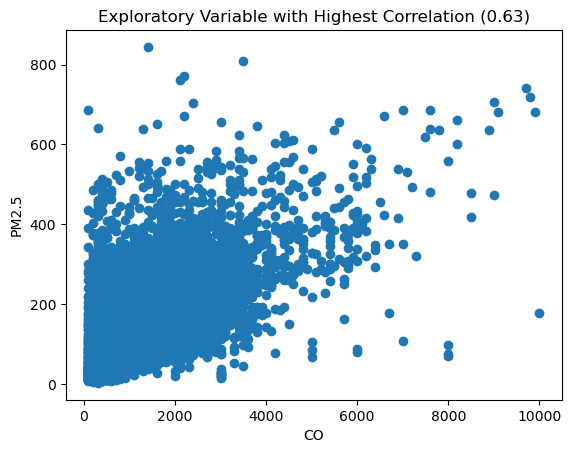

In [12]:
#-- Select the explanatory variables for the simple linear regression, then the multiple linear regression, and display the scatter plots
#plot the scatter plot for CO
plt.scatter(X["CO"], Y)
plt.xlabel("CO")
plt.ylabel("PM2.5")
plt.title("Exploratory Variable with Highest Correlation (0.63)")
plt.show()

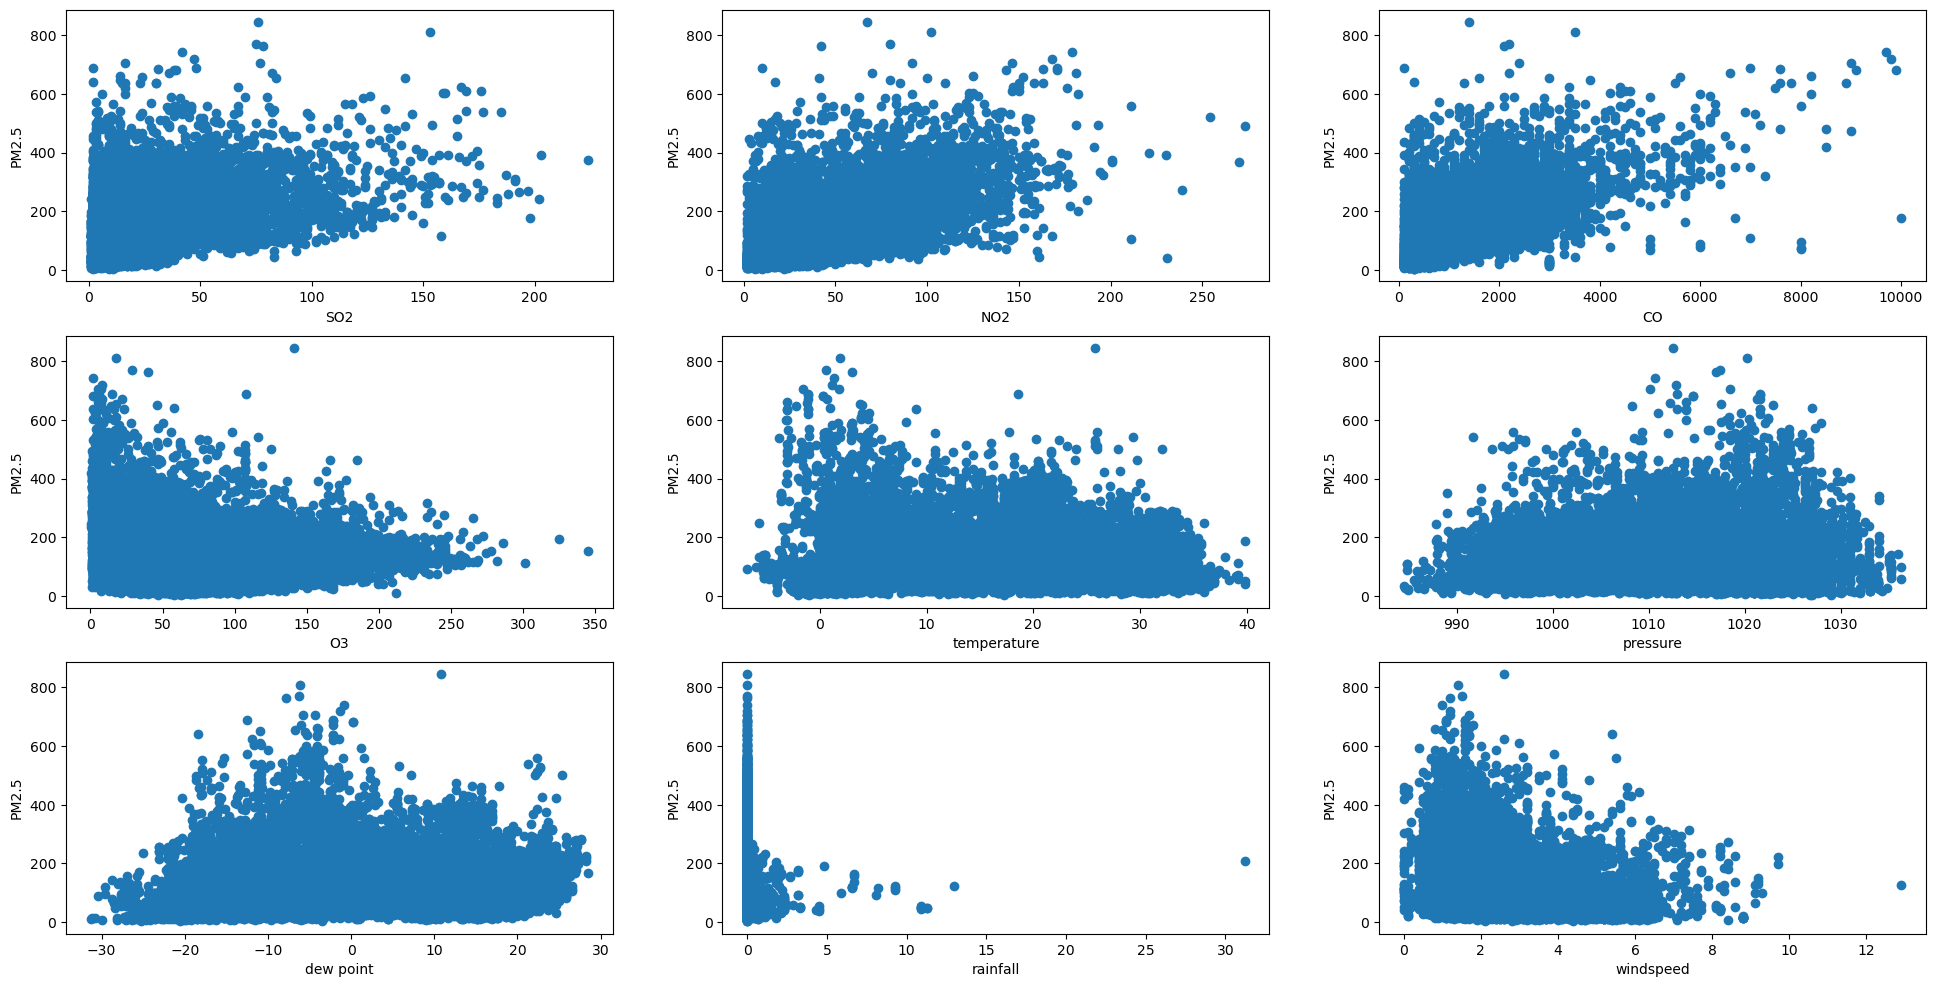

In [13]:
#-- Select the explanatory variables for the simple linear regression, then the multiple linear regression, and display the scatter plots
plt.figure(figsize=(24, 12))

plt.subplot(331)
plt.scatter(X["SO2"], Y)
plt.xlabel("SO2")
plt.ylabel("PM2.5")

plt.subplot(332)
plt.scatter(X["NO2"], Y)
plt.xlabel("NO2")
plt.ylabel("PM2.5")

plt.subplot(333)
plt.scatter(X["CO"], Y)
plt.xlabel("CO")
plt.ylabel("PM2.5")

plt.subplot(334)
plt.scatter(X["O3"], Y)
plt.xlabel("O3")
plt.ylabel("PM2.5")

plt.subplot(335)
plt.scatter(X["temperature"], Y)
plt.xlabel("temperature")
plt.ylabel("PM2.5")

plt.subplot(336)
plt.scatter(X["pressure"], Y)
plt.xlabel("pressure")
plt.ylabel("PM2.5")

plt.subplot(337)
plt.scatter(X["dew point"], Y)
plt.xlabel("dew point")
plt.ylabel("PM2.5")

plt.subplot(338)
plt.scatter(X["rainfall"], Y)
plt.xlabel("rainfall")
plt.ylabel("PM2.5")

plt.subplot(339)
plt.scatter(X["windspeed"], Y)
plt.xlabel("windspeed")
plt.ylabel("PM2.5")

plt.show()



In [14]:
#-- Extract the data and creates two X matrices that will be used for the regression (have a look at page 26 to know the form of X):
slr_X = X["CO"].to_numpy() #creates a matrix for the simple linear regression with X  as CO
#print(slr_X.shape)

mlr_X = X.to_numpy() #creates a matrix for the simple linear regression with X  as CO
#print(mlr_X.shape)

#---- Xs for simple lin reg and Xm for multiple lin reg

print("Size of slr_X is " , slr_X.shape)
Xs = np.vstack(slr_X) #put the CO column together as a matrix by stacking vertically
print("Size of Xs is " , Xs.shape)
#slr_X[:, np.newaxis]

Xm = np.vstack(mlr_X) #put the CO column together as a matrix by stacking vertically
print("Size of Xm is " , Xm.shape)

#-- Check the size of both matrices

## Hint: use stack/hstack/vstack

Size of slr_X is  (11160,)
Size of Xs is  (11160, 1)
Size of Xm is  (11160, 9)


Given a 1-D array such as (11160,) which means it is 1 dimensional array of 11160 rows. To make it 2D, I can either give it a new axis such as slr_X[:, np.newaxis], i.e giving it a new column, or I can stack it vertically using vstack. This produces a 2d array. Hencxe, (11160,) becomes (11160,1), .e a new dimension

In [23]:
print("Mean of Xs before standardisation is :", Xs.mean(), "Standard-Deviation is:", Xs.std())
print("Mean of Xm before standardisation is :", Xm.mean(), "Standard-Deviation is:", Xm.std())

Mean of Xs before standardisation is : 1165.9181003584229 Standard-Deviation is: 1010.3942400634421
Mean of Xm before standardisation is : 259.9248995440064 Standard-Deviation is: 558.2835187688512


In [24]:
#print("Mean of Xs before standardisation is :", Xs.mean(axis=0), "Standard-Deviation is:", Xs.std(axis=0))
#print("Mean of Xm before standardisation is :", Xm.mean(axis=0), "Standard-Deviation is:", Xm.std(axis=0))

In [25]:
#--- Write the standardisation function to mean-center the X data
# standardisation more or less brings the data to a common scale
def standardisation(X):
    return (X - np.mean(X, axis = 0)) / (np.std(X, axis = 0, ddof=1))

#-- Test 1 - simple lin reg
Xs_norm = standardisation(Xs)

#print(Xs_norm)
print(Xs_norm.shape)
print(Xs_norm.mean(axis=0))


(11160, 1)
[9.677643e-17]


In [26]:
#-- Test 2 - multiple lin reg

Xm_norm = standardisation(Xm)
#print(Xm_norm)
print(Xm_norm.shape)
print(Xm_norm.mean(axis=0))

(11160, 9)
[-1.47840720e-16  3.13812099e-16 -1.34576614e-16  1.56883666e-16
 -1.41356461e-15 -4.21493863e-13 -4.95382309e-16 -9.59308300e-16
 -7.30993322e-15]


In [27]:
#-- Preparing the matrix used for the regression linear when using the gradient descent algorithm
#insert ones into the first column of the matrix to account for beta_not.x0

ones = np.ones(11160,)
XS= np.insert(Xs_norm, 0, ones, axis = 1) #arra, position to fill, what to fill with and axis to fill, which is columns.
XS.shape


(11160, 2)

In [28]:
XS

array([[ 1.        , -0.85697173],
       [ 1.        , -0.26317073],
       [ 1.        ,  0.42959712],
       ...,
       [ 1.        ,  1.8151328 ],
       [ 1.        , -0.65903806],
       [ 1.        ,  0.03372978]])

In [29]:
XM = np.insert(Xm_norm, 0, ones, axis=1)
XM.shape

(11160, 10)

## Least squares or maximum likelihood solution

In [31]:
#-- To compare the results of the gradient descent algorithm, we will first implement an exact solution with the maximum likelihood
#Formulae recall: (X^T X)^-1 X^T Y

#β∗ = (((X^T, X)^−1, X^T),Y) >>> least squares buffe
# β∗ = maximum likelihood coefficient
def coef_ml(x,y):
    beta_star = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)), x.T), y)
    return beta_star

In [32]:
#-- Test 1  - simple reg
beta_star_XS = coef_ml(XS,Y)
print("Maximum Likelihood Coefficient of XS is :", beta_star_XS)


Maximum Likelihood Coefficient of XS is : [144.78560932  65.52805564]


In [33]:
#-- Test 2 - multiple reg
beta_star_XM = coef_ml(XM,Y)
print("Maximum Likelihood Coefficient of XM is :", beta_star_XM)

#-- (We can also use the native functions of Scikit-Learn, but they are more parameters that needs to be tuned)

Maximum Likelihood Coefficient of XM is : [144.78560932   6.91262366  27.55473823  38.85791722  15.59102383
 -29.33682464  -2.98114857  12.80369661  -4.76777333   3.78588212]


## Gradient descent algorithm

In the following we will implement several functions to apply linear regression.
These functions should be generic and work for any number of explanatory varaibles. You should be able to apply them to Xs and Xm standardized variables.

WARNING: parameters of the functions needs to be completed

### Step 1: Define Function (or MODEL) for the prediction of Y

In [34]:
#-- Formula to define the Model of the optimum line for the predicted value of Y
#-- Model F
# f(x) = bo + b1x1 + b2x2....
# -- we need to define random values of beta for both the simple and multiple linear regression

def f(x,beta):
    return  np.dot(x,beta)
    

### Get the predictions of the first five observations of XS and XM

In [36]:
#-- Test 1 - simple reg
# using the function earlier declared and random beta parameters, predict the target value "Y" for the  first five observations of the simple linear regression.

beta_xs = np.random.rand(XS.shape[1]) # gets random values of beta for the simple linear equation, with just one feature(column)

y_prediction_XS = f(XS,beta_xs)
print("The 1st five Prediction of XS is: " , y_prediction_XS[:5])
print(y_prediction_XS.shape[0])


The 1st five Prediction of XS is:  [0.75570334 0.79069063 0.83150914 0.76153455 0.87226934]
11160


In [744]:
#print(Y[:5])

In [37]:
#-- Test 2 - multiple reg
beta_xm = np.random.rand(XM.shape[1]) # gets random values of beta for the simple linear equation, with just one feature(column)

y_prediction_XM = f(XM,beta_xm)
print("The 1st five Prediction of XM is: " ,y_prediction_XM[:5])
print(y_prediction_XM.shape[0])

The 1st five Prediction of XM is:  [-2.5317922  -1.09055179  0.8660608  -1.54741489  2.56885875]
11160


### Step 2: Define the Cost Function or MSE  

In [38]:
#%% Cost function
#this gives the mse , not rmse
def cost(y_prediction):
    return np.sum(np.square(y_prediction-Y))/(2*Y.shape[0])


In [39]:
# another method to define the cost function
#def mse(y_prediction):
    #error= Y-y_prediction
    #loss = (np.dot(error.T, error))/(2*Y.shape[0])
    #return loss

### Apply the MSE / Loss Function or Cost Function of XS and XM

In [40]:
#%% Test 1 - simple reg
cost_xs = cost(y_prediction_XS)
print(" The Cost function of XS is :", cost_xs)

 The Cost function of XS is : 15657.658846233053


In [749]:
#%% Test 1 - simple reg
rmseXS = np.sqrt(cost_xs)
rmseXS

124.9850746369216

In [750]:
#%% Test 2 - multiple reg
cost_xm = cost(y_prediction_XM)
print(" The Cost function of XM is :", cost_xm)

 The Cost function of XM is : 15733.20059462695


In [751]:
rmseXS = np.sqrt(cost_xm)
rmseXS

125.43205569003065

### Step 3: Define the Gradient (Derivative of the Cost Function) as a function 

In [752]:
#%% Computation of the gradient
# gradient = ∂/∂βj *J(β^(k−1))


def gradient(x,y_prediction):
    #dc_db0= -((np.sum(yhat-Y)/x.shape[0]))
    grad = np.dot((y_prediction-Y),x)/x.shape[0]
    #grad = [dc_db0, dc_db1]
    return grad

### Apply the gradient for the XS and XM

In [753]:
#%% Test 1 - simple reg
gradient_XS = gradient(XS,y_prediction_XS)
print(" The Gradient of XS is: ", gradient_XS)

 The Gradient of XS is:  [-143.8033736   -65.29412298]


In [754]:
#%% Test 2 - multiple reg

gradient_XM = gradient(XM,y_prediction_XM)
print(" The Gradient of XM is: ", gradient_XM)


 The Gradient of XM is:  [-144.59317383  -49.91081541  -58.57240451  -65.22705121   23.05494105
   26.11404192  -15.00668634    3.74941092    4.65804774   19.68638936]


### Step 4: Compute the Gradient Descent Algorithm

In [761]:
def gradient_descent(x, y_prediction, beta, alpha):
    # perform one step of gradient descent
    beta_optimal = beta - alpha * gradient(x,y_prediction)    
    return beta_optimal

### Apply the Gradient Descent Algorithm for the Simple and Multiple Linear Regressions

In [765]:
#Test 1 - simple linear

# learning rate used is 0.1
first_descent_XS = gradient_descent(XS,y_prediction_XS,beta_xs,0.1)
print("First Descent beta parameters of XS are ", first_descent_XS)

First Descent beta parameters of XS are  [15.36257308  6.7574937 ]


In [766]:
#Test 2 - multiple linear

first_descent_XM = gradient_descent(XM,y_prediction_XM,beta_xm,0.1)
print("First Descent beta parameters of XM are: ", first_descent_XM)

First Descent beta parameters of XM are:  [14.65175287  4.99132517  6.68350666  6.75868029 -1.82881953 -1.84913641
  1.88011818 -0.03672147  0.41248898 -1.07849056]


## Experiment with several initialisations: visualisation of the cost function and parameter values during the iterations

### Update Gradient Descemt Algorithm to account for iterations of beta parameters

In [778]:
#%% Gradient descent algorithm

def gradient_descent(x,beta,epochs,alpha):
    i = 0
    betas = []
    costFunctions=[]
    for i in range(epochs):
        y_prediction = f(x,beta)
        loss = cost(y_prediction)  #predict and calculate cost functions at each betas, it takes in Y
        beta_new = beta - alpha * gradient(x,y_prediction)   # perform one step of gradient descent
        betas.append(beta)
        costFunctions.append(loss)
        if costFunctions[i] > costFunctions[i-1]:
                break     
        i+=1
        beta = beta_new  
        
        
        
    #plot the cost function for each iteration
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.plot(costFunctions, label = "MSE:" +str(min(costFunctions)))
    plt.xlabel("Epochs")
    plt.ylabel("Cost Functions")
    plt.title("Cost Function at learning rate" +str(alpha))
    plt.legend()
    
    #plot the beta parameters for each iteration
    plt.subplot(122)
    plt.plot(betas)
    plt.xlabel("Epochs")
    plt.ylabel("Beta")
    plt.title("Betas at learning rate" +str(alpha))
    
    label_s = ["b0", "b1"]
    label_m = ["b0", "b1", "b2", "b3", "b4", "b5", "b6", "b7", "b8", "b9"]
    
    if len(beta) == len(label_s):
        plt.legend(label_s)
    else:
        plt.legend(label_m)
        
    #plt.show()
    
    
    
    return beta, min(costFunctions)


### Apply the Gradient Descent Algorithm using 100 epochs and 0.1  as learning rate 

(array([144.7817897 ,  65.52631945]), 3149.7114888865294)

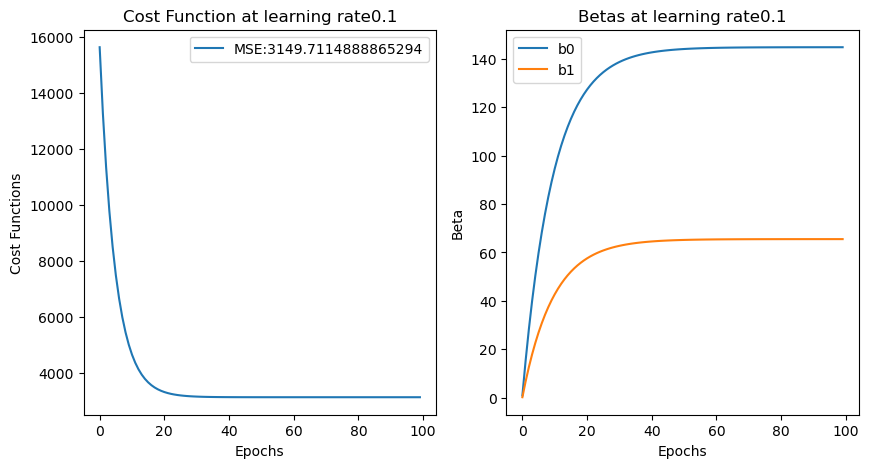

In [779]:
#-- Test 1  - simple reg
gd_xs = gradient_descent(XS,beta_xs,100,0.1)
gd_xs

(array([144.78176872,   7.6482668 ,  25.71651629,  40.95693892,
         12.82843968, -20.35809769,  -0.43515851,   8.17277313,
         -4.36526366,   3.23853457]),
 2915.7841753580806)

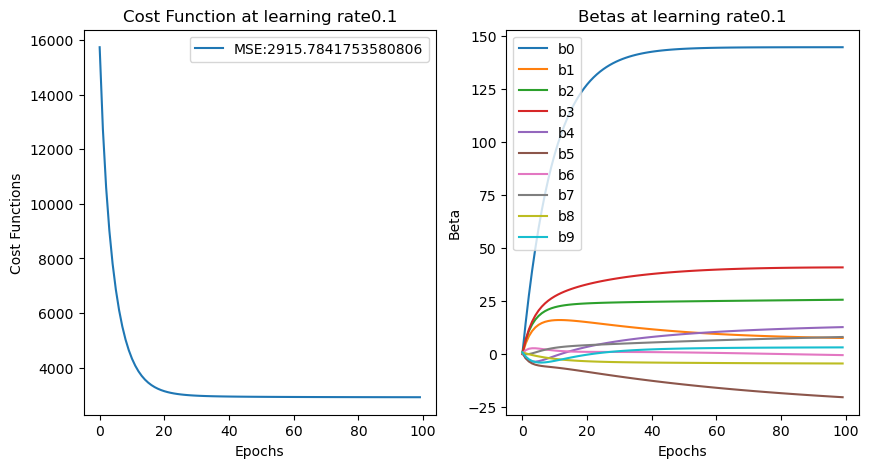

In [780]:
#-- Test 2 - multiple reg
gd_xm = gradient_descent(XM,beta_xm,100,0.1)
gd_xm

**Notes:**


(maximum likelihood coeficient  of simple linear regression-  144.78560932  65.52805564)
(maximum likelihood coeficient  of simple linear regression-  144.78560932   6.91262366  27.55473823  38.85791722  15.59102383
 -29.33682464  -2.98114857  12.80369661  -4.76777333   3.78588212)
 
mse of slr - 15621.268881996863
mse of mlr -- 15733.20059462695 



--------------------------------------------------------------------------------------------------------

For the simple linear regression, 
Whilst maintaining a constant learning rate of 0.1, and iterating for 100 epochs, a minimum cost function of  3149.7114888865294 was achieved at an intercept (b0) of 144.7817897, and a slope (b1) of 65.52631945. Comparing these beta parameters with the maximum likelihood coeficient, the values are really close and hence they could be accepted as optimum parameters to derive the best function for the prediction. 


For the multiple linear regression, using the same constant learning rate of 0.1, and iterating for 100 epochs, a min cost function of    2915.7841753580806 was achieved using the beta parameters 144.78176872,   7.6482668 ,  25.71651629,  40.95693892, 12.82843968, -20.35809769,  -0.43515851,   8.17277313, -4.36526366,   3.23853457 are more dissimilar when compared to the maximum lilihood coefficient , than for the s.l.r. Though, not very different. 
However, the mse


### Experiment using new set of random beta parameters for initialisationa


(array([144.78560932,  65.52805564]), 3149.7114780201705)

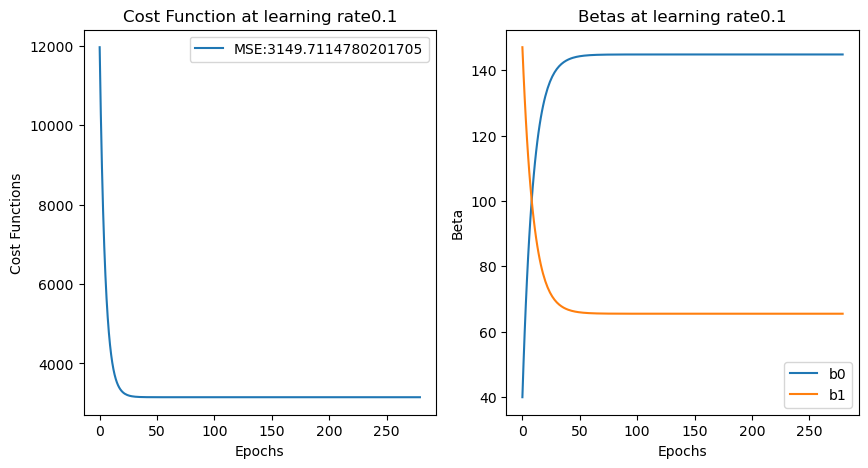

In [781]:
#experiment with other values of beta
#beta_xs = np.random.rand(XS.shape[1])
new_beta_xs = np.random.randint(150, size=XS.shape[1])

#-- Test 1  - simple reg
gd_xs_newbeta = gradient_descent(XS,new_beta_xs,1000,0.1)
gd_xs_newbeta


(array([144.78560932,   6.91228781,  27.55276659,  38.86126384,
         15.58879477, -29.32808863,  -2.97926418,  12.79797723,
         -4.76736965,   3.78505512]),
 2909.8972450966403)

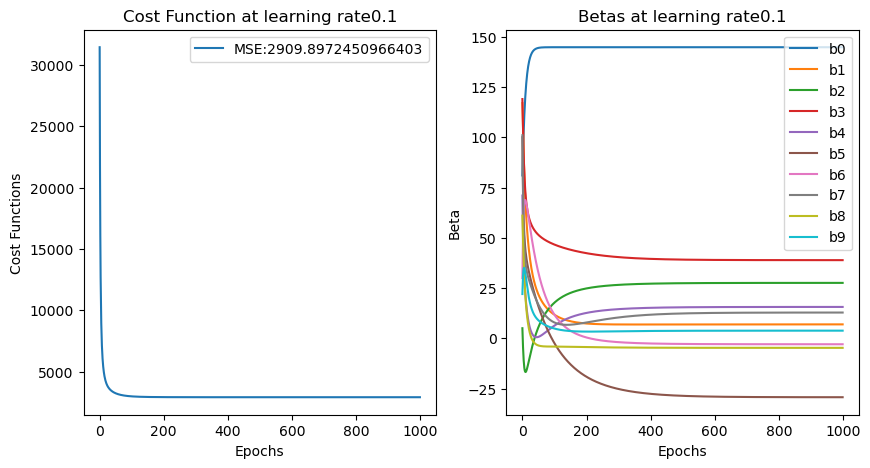

In [782]:
#-- Test 2  - multiple reg
new_beta_xm = np.random.randint(150, size=XM.shape[1])
gd_xm_newbeta = gradient_descent(XM,new_beta_xm,1000,0.1)
gd_xm_newbeta

**Notes:**

(maximum likelihood coeficient  of simple linear regression-  144.78560932  65.52805564)
(maximum likelihood coeficient  of simple linear regression-  144.78560932   6.91262366  27.55473823  38.85791722  15.59102383
 -29.33682464  -2.98114857  12.80369661  -4.76777333   3.78588212)
 
mse of slr - 15621.268881996863
mse of mlr -- 15733.20059462695

--------------------------------------------------------------------------------------------------------------


This time, the beta parameters were confined to a  range of 100, still maintaing the learning rate for 1000 epochs. 

For the simple linear regression, there are negligible changes observed for the beta parameters  144.78560932,  65.52805564 and the minimum mean of  3149.7114780201705

Its a similar case for the multiple linear regression, the beta parameters 144.78560932,   6.91228781,  27.55276659,  38.86126384, 15.58879477, -29.32808863,  -2.97926418,  12.79797723, -4.76736965,   3.78505512 , but the minimum cost function reduced slightly from 2915.7841753580806 to 2909.8972450966403.



## Experiment with several learning rates: visualisation of the cost function and parameter values during the iterations

(array([144.78560932,  65.52805564]), 3149.7114780201705)

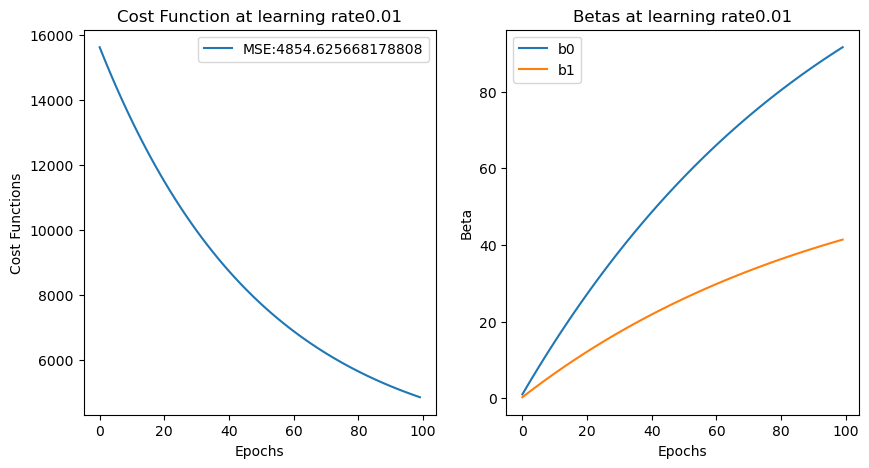

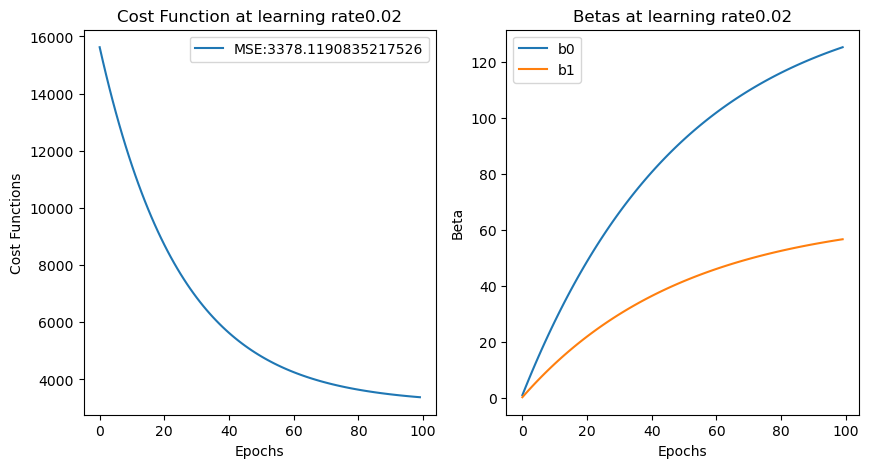

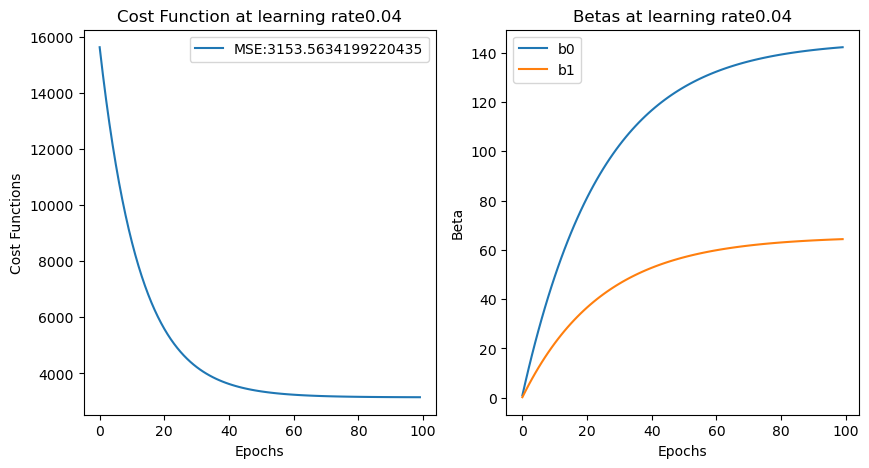

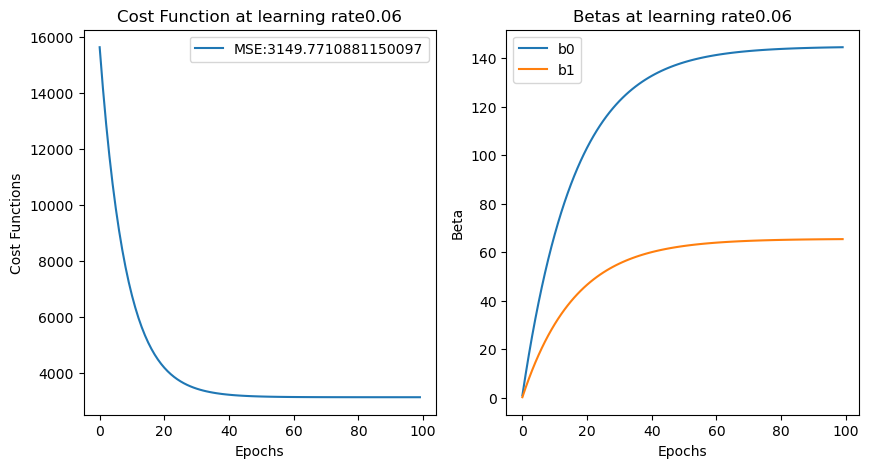

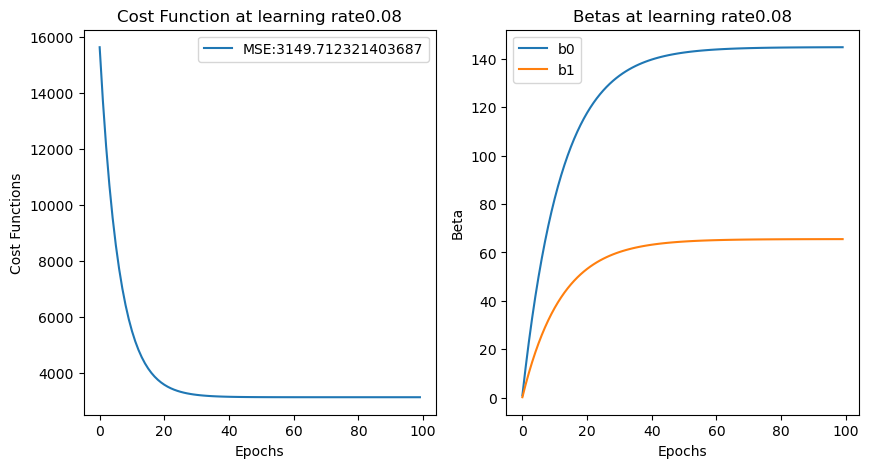

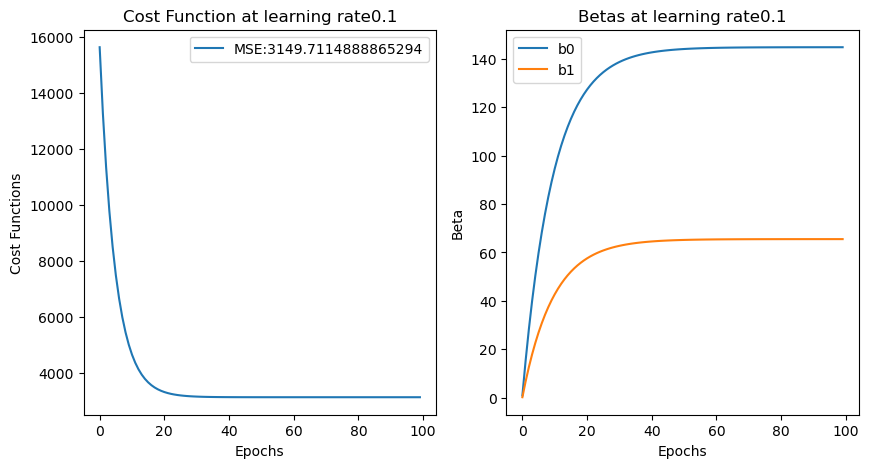

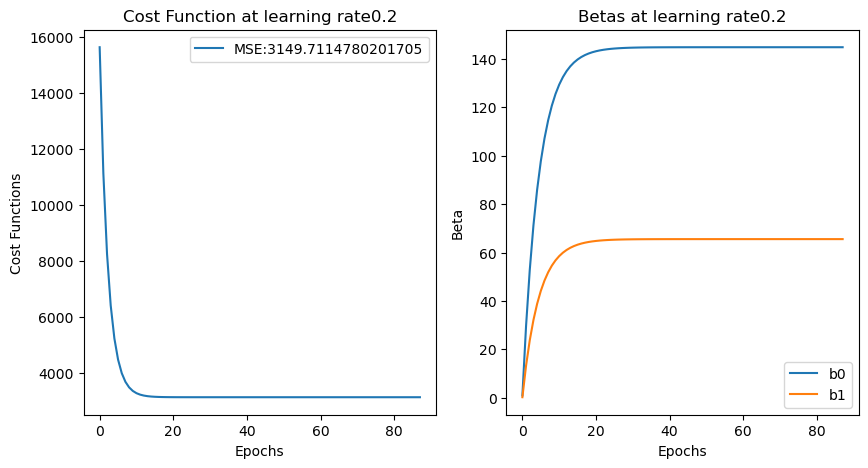

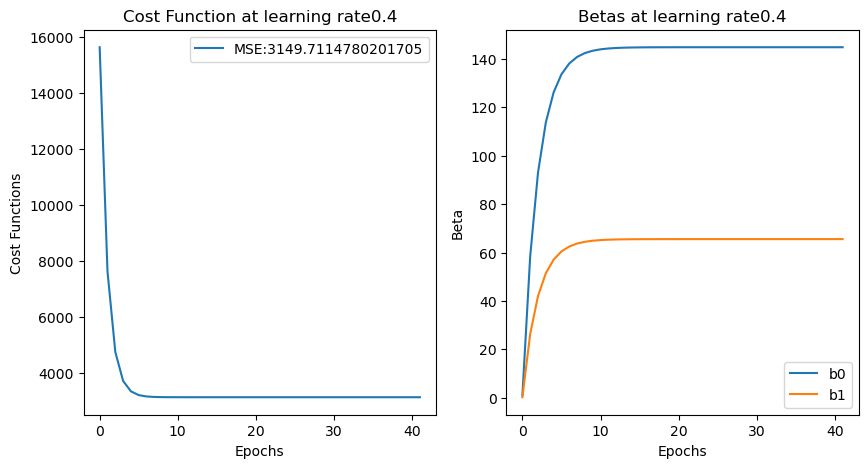

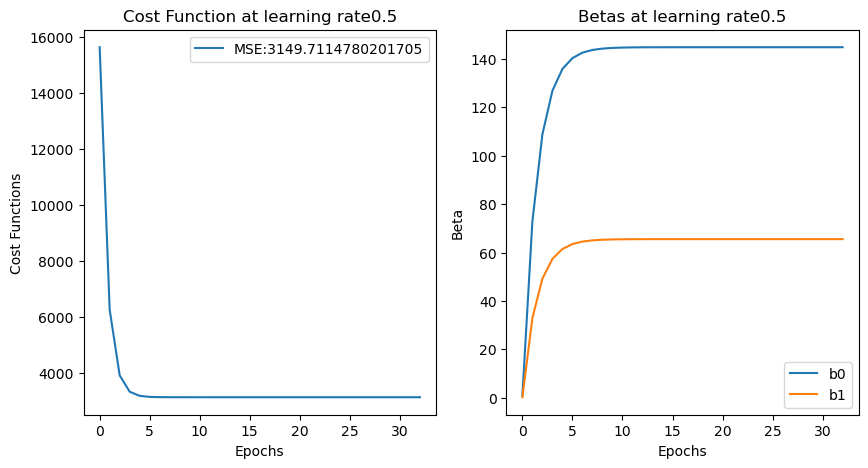

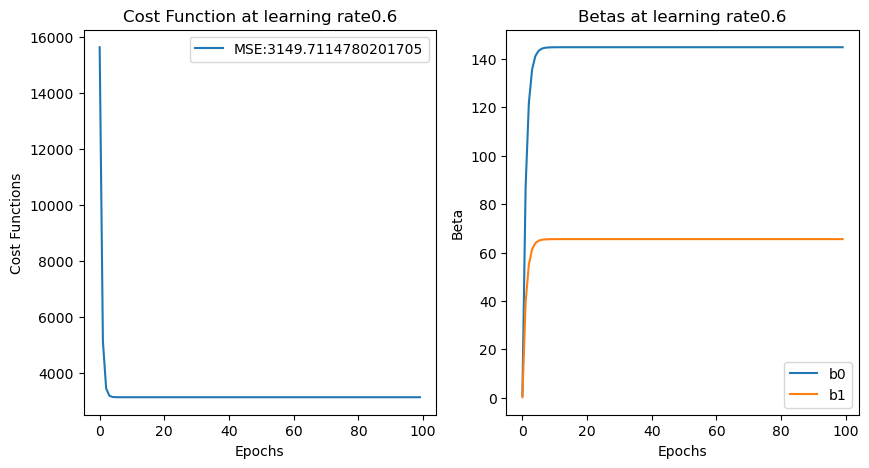

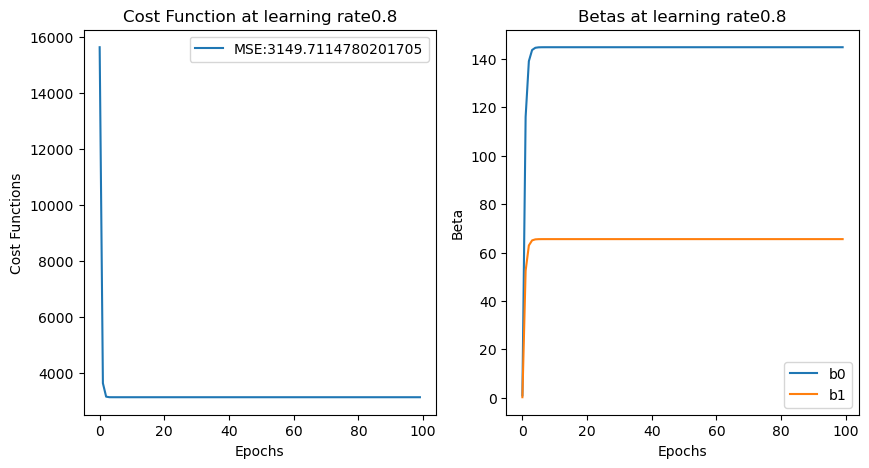

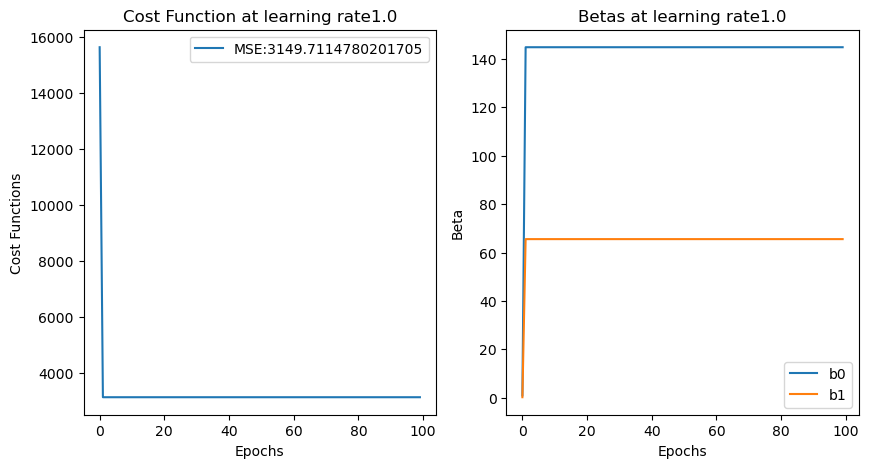

In [785]:
#experiment for different learning rates
#learning rates = alpha

alpha = [0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.5, 0.6,0.8, 1.0]

#-- Test 1  - simple reg

for i in alpha:
    gd_learningRate_XS = gradient_descent(XS,beta_xs,100,i)
gd_learningRate_XS
    
    


(array([144.78560932, -50.24859363, -43.3607976 , -32.20898662,
         67.08789311,  52.62821021, -49.45086323,  41.10897524,
         -3.21179032,  27.65575517]),
 11035.137561019435)

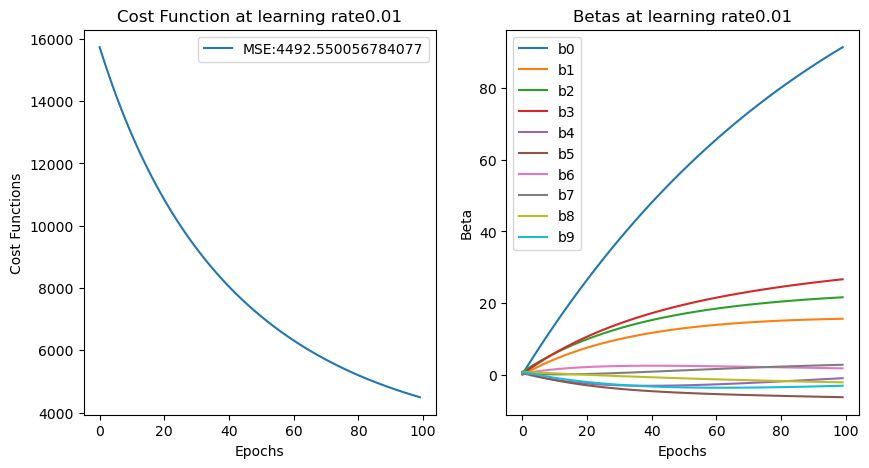

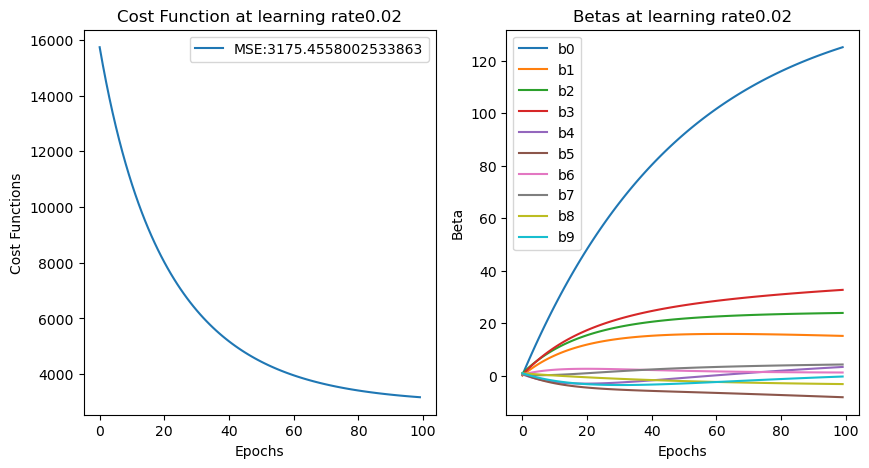

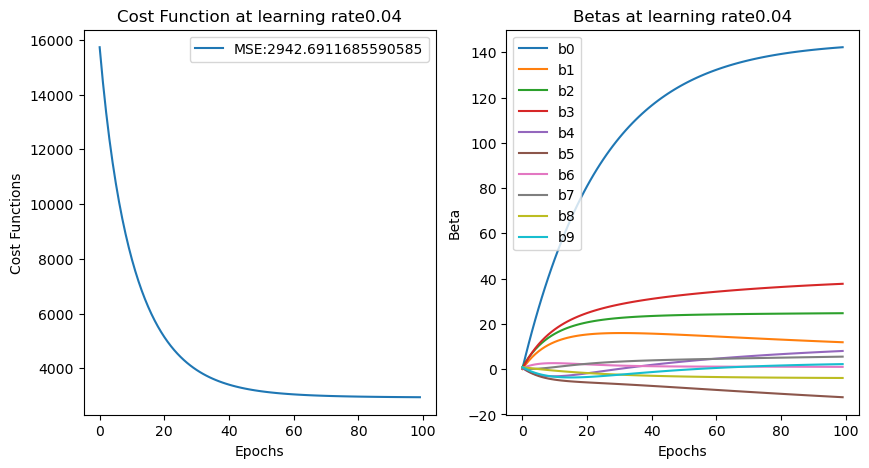

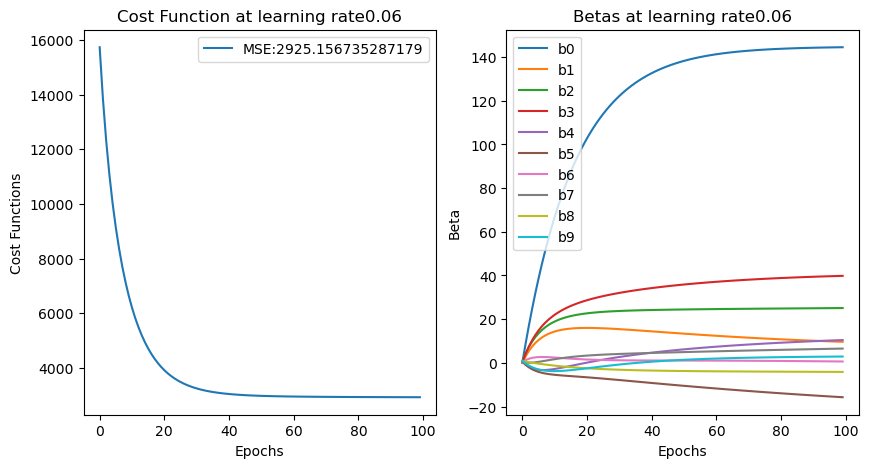

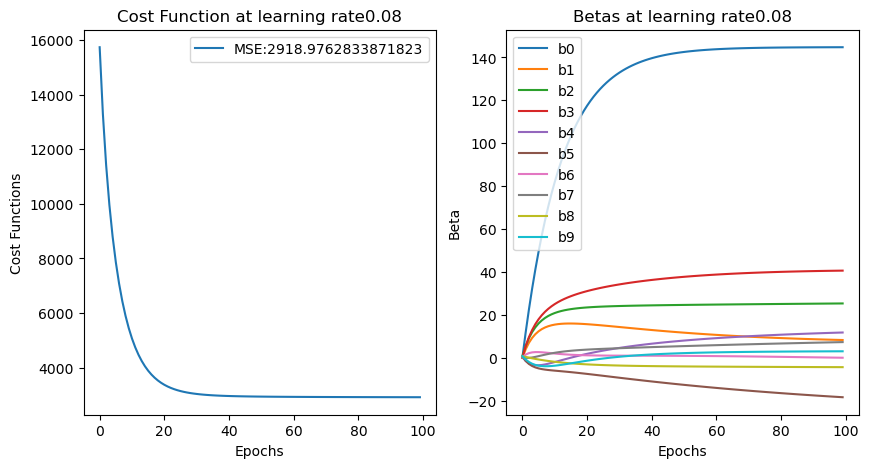

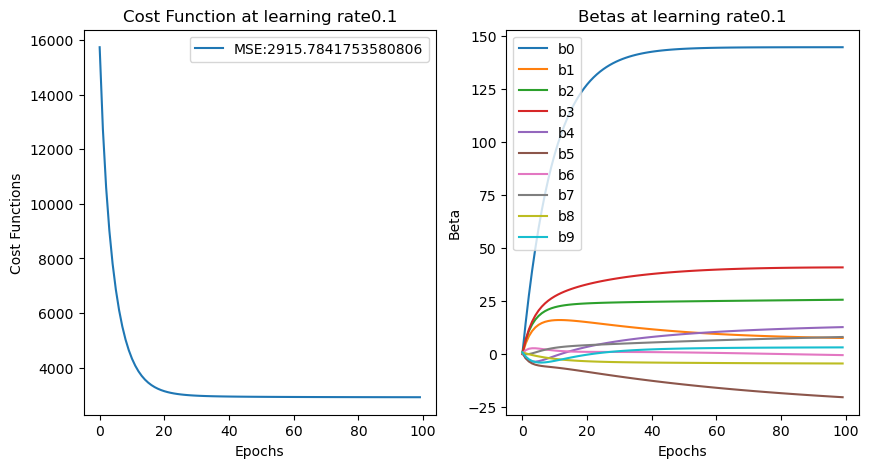

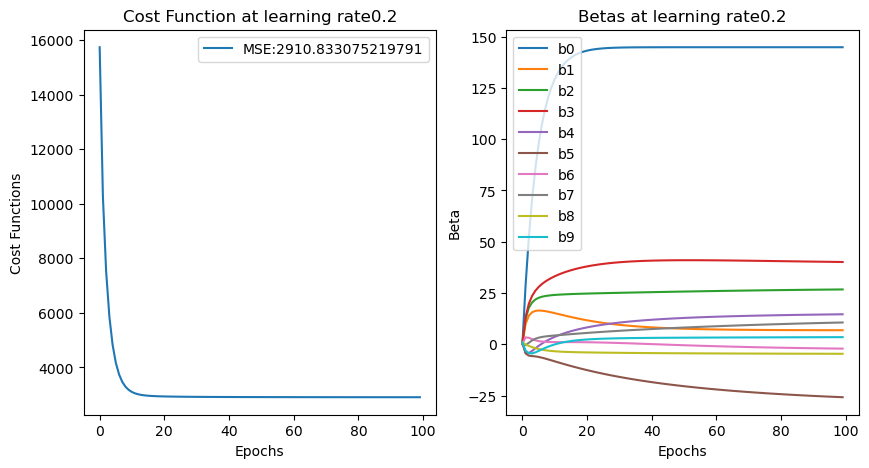

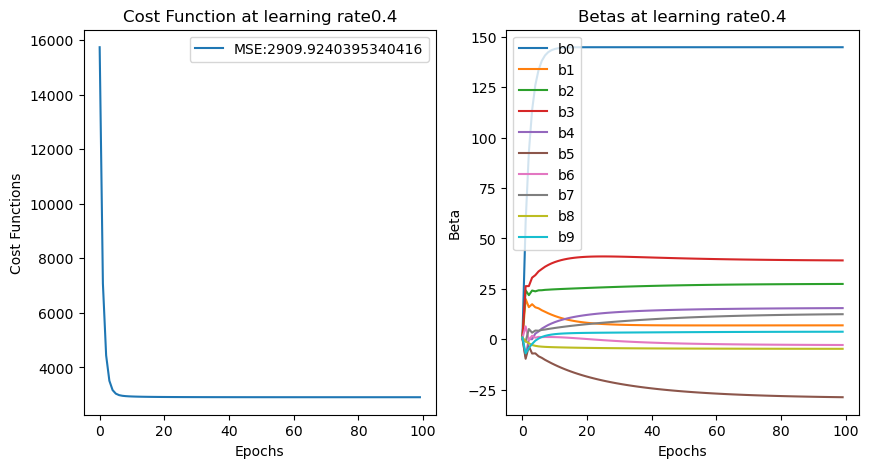

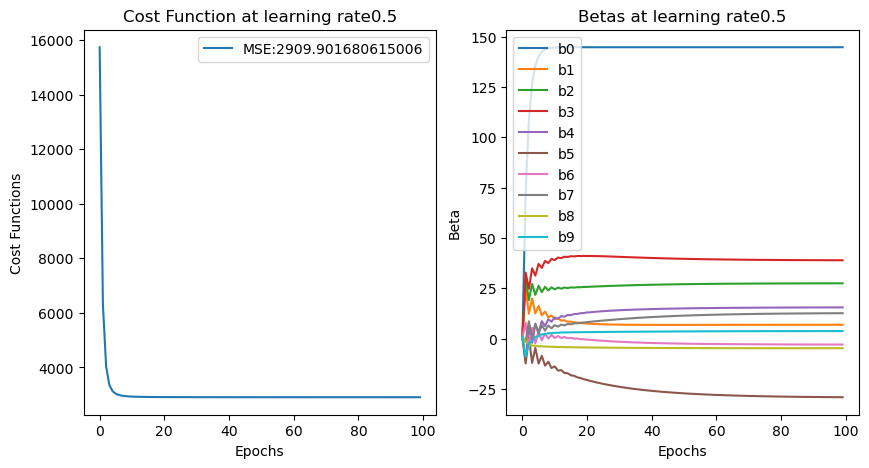

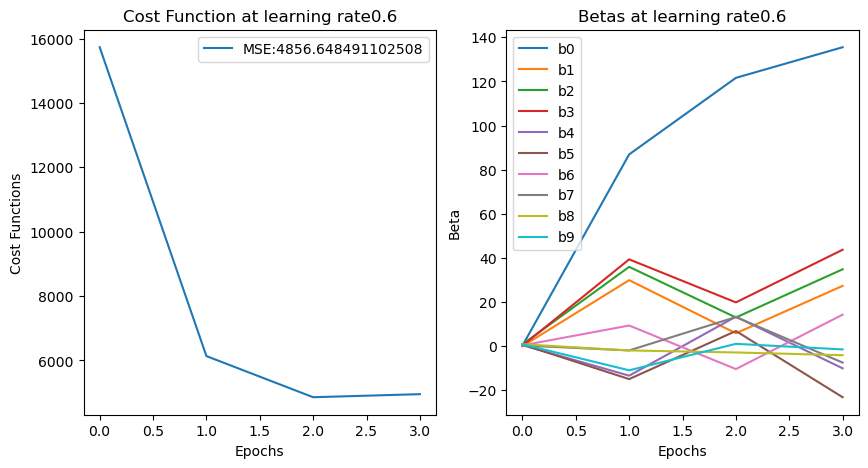

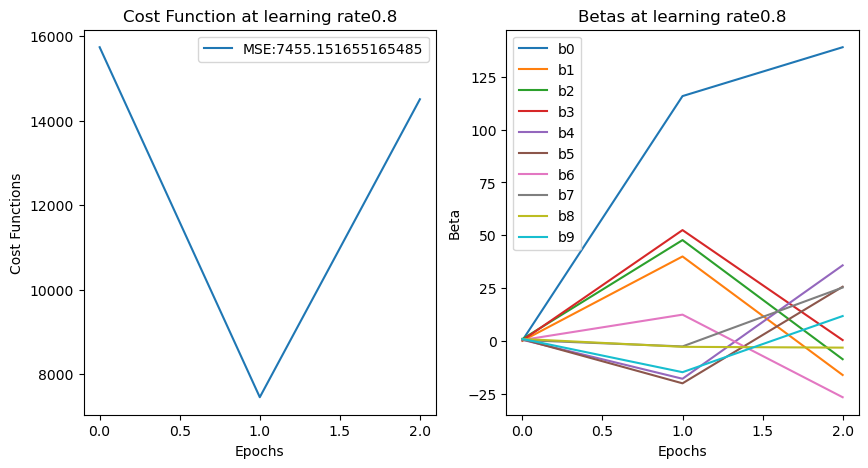

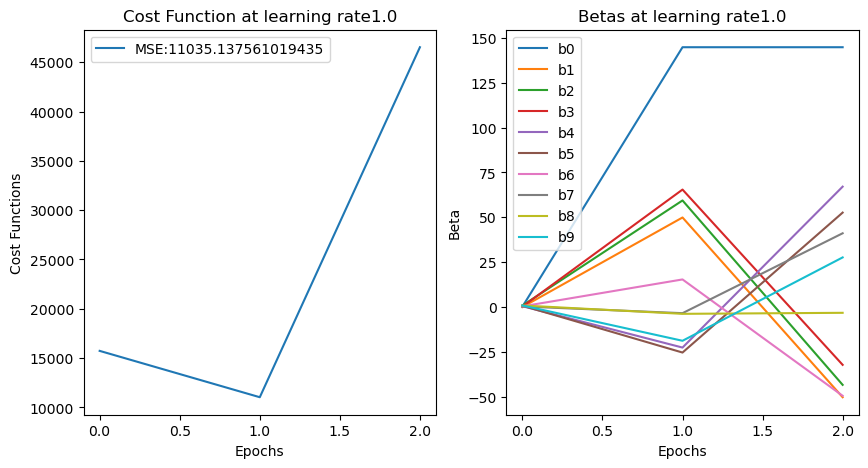

In [787]:
#-- Test 1  - multiple reg

for i in alpha:
    gd_learningRate_XM = gradient_descent(XM,beta_xm,100,i)
gd_learningRate_XM   

**Notes:**

**Notes:**

(maximum likelihood coeficient  of simple linear regression-  144.78560932  65.52805564)
(maximum likelihood coeficient  of simple linear regression-  144.78560932   6.91262366  27.55473823  38.85791722  15.59102383
 -29.33682464  -2.98114857  12.80369661  -4.76777333   3.78588212)
 
mse of slr - 15621.268881996863
mse of mlr -- 15733.20059462695

--------------------------------------------------------------------------------------------------------------

visualising the result for different learning rate values shows that the learning rate has a great impact on speed at which the least cost is attained. FRom the plots we see that a learning rate of 1.0 clearly overfit. Basically, it is bvest use an optimal alpha value of 0.08




## Notes
**on the choice of the stopping criterion:**





**on the data normalisation:**





**Notes:**